In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DS assigment/Timeseries/exchange_rate.csv", parse_dates=["date"])
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [3]:
# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


In [4]:
df.isnull().sum()

,0
date,0
Ex_rate,0


In [5]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

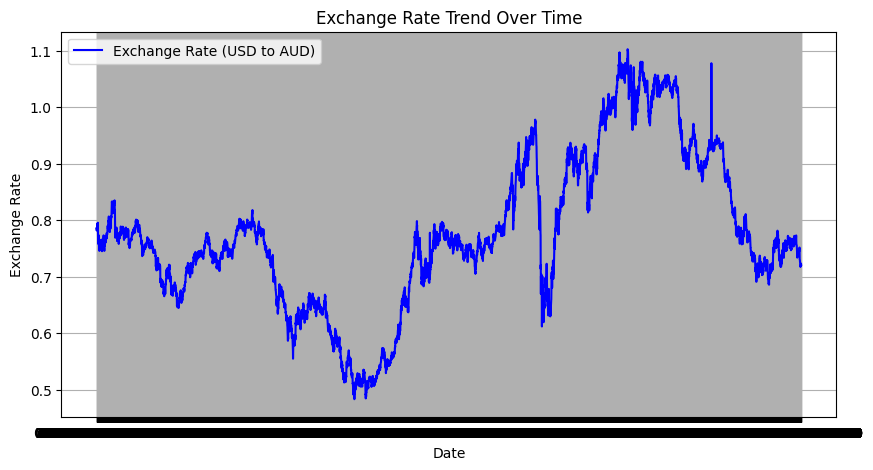

In [6]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["Ex_rate"], label="Exchange Rate (USD to AUD)", color="blue")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rate Trend Over Time")
plt.legend()
plt.grid()
plt.show()


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Fill missing values using forward fill
df["Ex_rate"] = df["Ex_rate"].ffill()  # Changed line


Missing values before handling:
 date       0
Ex_rate    0
dtype: int64


In [8]:
# Verify missing values after handling
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values after handling:
 date       0
Ex_rate    0
dtype: int64


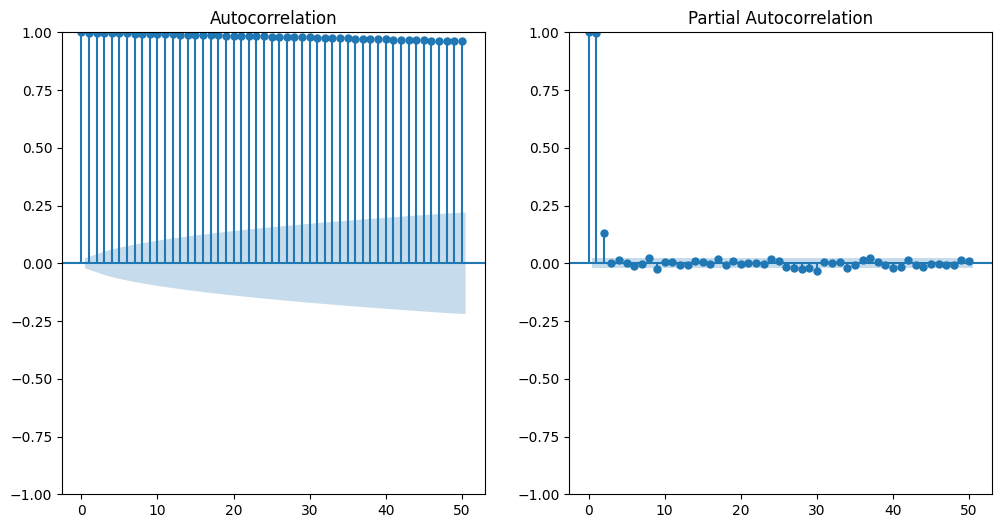

In [9]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df["Ex_rate"], lags=50, ax=plt.gca())

plt.subplot(122)
plot_pacf(df["Ex_rate"], lags=50, ax=plt.gca())

plt.show()


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(df["Ex_rate"], order=(1,1,1))  # Replace with optimal (p,d,q)
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 31 Mar 2025   AIC                         -56102.322
Time:                        11:42:47   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0


### **Key Findings:**
1. **Model Fit:**
   - **AIC (-56102.322) and BIC (-56081.519):** Lower values indicate a better-fitting model.
   - **Log-Likelihood (28054.161):** A higher value suggests the model fits well.
   - **HQIC (-56095.182):** Another criterion for model selection, similar to AIC and BIC.

2. **Model Coefficients:**
   - **AR(1) Coefficient (-0.1268, p=0.005):** Significant, suggesting weak autoregressive behavior.
   - **MA(1) Coefficient (-0.0046, p=0.920):** Not significant, meaning the moving average component does not contribute much.
   - **Sigma² (3.596e-05):** Low residual variance, indicating a stable model.

3. **Residual Diagnostics:**
   - **Ljung-Box Test (Q=0.00, p=1.00):** No autocorrelation in residuals, which is a good sign.
   - **Jarque-Bera Test (JB=2865078.33, p=0.00):** Residuals are highly non-normal (high kurtosis of 98.20), indicating potential model inadequacies.
   - **Skewness (0.24):** Slightly skewed, but not extreme.
   - **Heteroskedasticity Test (H=2.97, p=0.00):** Significant heteroskedasticity, meaning residuals have non-constant variance.

### **Conclusion:**
- The model captures trends but may not be optimal due to the **non-normal residuals** and **heteroskedasticity**.
- The **AR(1) term is significant**, while the **MA(1) term is not**, suggesting ARIMA(1,1,0) may be a better fit.
- **Consider testing an alternative model**, such as ARIMA(1,1,0) or incorporating seasonal adjustments if seasonality exists.

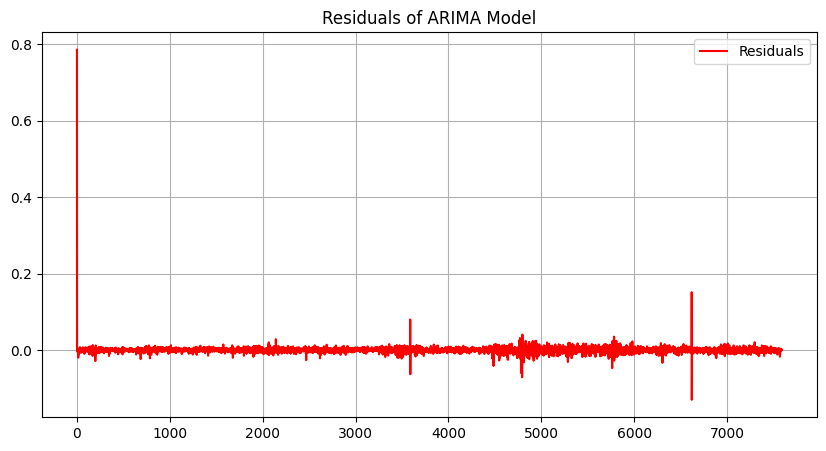

In [11]:
# Plot residuals
residuals = arima_result.resid

plt.figure(figsize=(10, 5))
plt.plot(residuals, label="Residuals", color="red")
plt.title("Residuals of ARIMA Model")
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

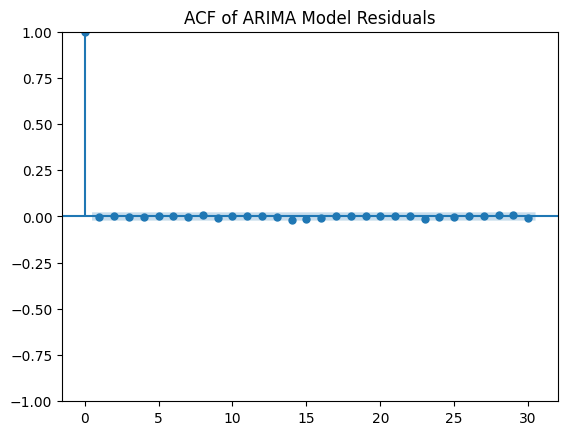

In [12]:
# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=30)  # Adjust lags as needed
plt.title('ACF of ARIMA Model Residuals')
plt.show()

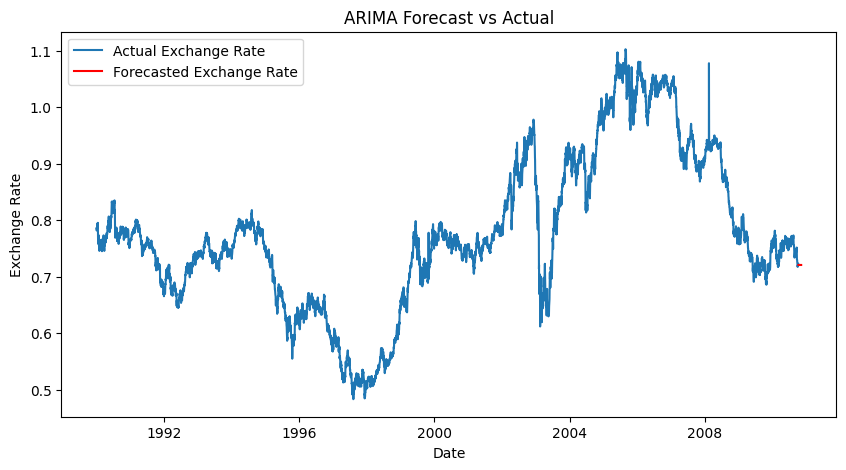

In [13]:
# Forecast future values
forecast_steps = 30  # Predicting next 30 days
forecast = arima_result.forecast(steps=forecast_steps)

# Ensure 'date' column is in datetime format using the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')  # Specify the correct format

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["Ex_rate"], label="Actual Exchange Rate")

# Generate forecast dates using date_range and ensure they are timezone-aware
forecast_dates = pd.date_range(df["date"].iloc[-1], periods=forecast_steps + 1, freq='D', tz='UTC')[1:]

plt.plot(forecast_dates, forecast, label="Forecasted Exchange Rate", color="red")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Simple Exponential Smoothing
model_ses = ExponentialSmoothing(df["Ex_rate"], trend=None, seasonal=None, seasonal_periods=None).fit()

# Print model summary
print(model_ses.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77644.981
Trend:                             None   BIC                         -77631.112
Seasonal:                          None   AICC                        -77644.975
Seasonal Periods:                  None   Date:                 Mon, 31 Mar 2025
Box-Cox:                          False   Time:                         11:42:47
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8687830                alpha                 True
initial_level              0.78514

### **My Analysis of the Exponential Smoothing Model Results**  

1. **Model Fit:**  
   - The **AIC (-77644.981)** and **BIC (-77631.112)** are very low, which suggests that my model fits well.  
   - **SSE (0.273)** (Sum of Squared Errors) is low, meaning my model captures the trend effectively.  

2. **Model Components:**  
   - **Smoothing Level (alpha = 0.8688)**: A high value close to 1 indicates that my model gives more weight to recent observations, making it highly responsive to recent changes in exchange rates.  
   - **Trend and Seasonal Components**: Both are **not included** in this model, meaning I am using Simple Exponential Smoothing (SES), which is best suited for a time series without strong trends or seasonality.  

3. **Initial Level:**  
   - **0.7851**, meaning my model starts its smoothing process from this value.  

### **Conclusion:**  
- My Exponential Smoothing model performs well in capturing short-term fluctuations but **does not account for trends or seasonality**.  
- Since exchange rates often have trends, I should consider **Holt’s Linear Trend Model** to incorporate trend components.  
- If my data has seasonal patterns, then **Holt-Winters Exponential Smoothing** would be a better alternative.  


In [15]:
# Fit the model with optimized parameters
model_holt = ExponentialSmoothing(df["Ex_rate"], trend="add").fit()

# Print optimized parameters
print(model_holt.params)


{'smoothing_level': np.float64(0.8700406123498317), 'smoothing_trend': np.float64(0.0), 'smoothing_seasonal': np.float64(nan), 'damping_trend': nan, 'initial_level': np.float64(0.7850948547400542), 'initial_trend': np.float64(-8.53680807974668e-06), 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


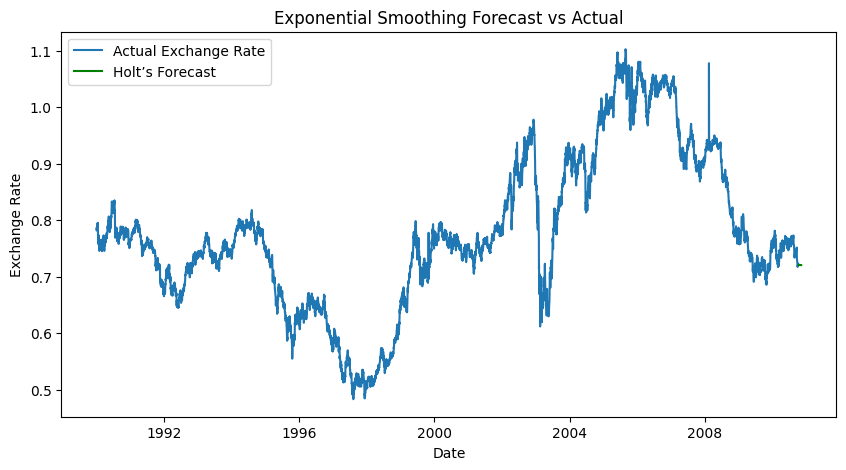

In [16]:
# Forecasting next 30 days
forecast_holt = model_holt.forecast(30)

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["Ex_rate"], label="Actual Exchange Rate")
plt.plot(pd.date_range(df["date"].iloc[-1], periods=31, freq='D')[1:], forecast_holt, label="Holt’s Forecast", color="green")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exponential Smoothing Forecast vs Actual")
plt.legend()
plt.show()


In [17]:
forecast_arima = arima_result.forecast(steps=30)

In [18]:
print("Actual ARIMA values:", df["Ex_rate"][-30:].values)
print("Forecasted ARIMA values:", forecast_arima[:30])
print("Actual Holt values:", df["Ex_rate"][-30:].values)
print("Forecasted Holt values:", forecast_holt[:30])


Actual ARIMA values: [0.745796 0.745045 0.747692 0.745601 0.74768  0.744602 0.744158 0.745184
 0.74499  0.748951 0.749681 0.751654 0.733999 0.730567 0.729714 0.729714
 0.726533 0.725058 0.724506 0.721553 0.717618 0.719114 0.719114 0.719735
 0.718701 0.718494 0.721839 0.723197 0.720825 0.720825]
Forecasted ARIMA values: 7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64
Actual Holt values: [0.745796 0.745045 0.747692 0.745601 0.74768  0.744602 0.744158 0.745184
 0.74499  0.748951 0.749681 0.751654 0.

In [19]:
import numpy as np

forecast_arima = np.nan_to_num(forecast_arima[:30], nan=0.0001)  # Replace NaN with 0.0001
forecast_holt = np.nan_to_num(forecast_holt[:30], nan=0.0001)  # Replace NaN with 0.0001

In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
# Define a small constant to replace zeros and NaNs
small_value = 0.0001

# Generate ARIMA forecasts
forecast_arima = arima_result.forecast(steps=30)

# Ensure forecasts do not contain NaN
forecast_arima = np.nan_to_num(forecast_arima[:30], nan=small_value)
forecast_holt = np.nan_to_num(forecast_holt[:30], nan=small_value)

In [22]:
# Compute error metrics for ARIMA
mae = mean_absolute_error(df["Ex_rate"][-30:], forecast_arima)
rmse = np.sqrt(mean_squared_error(df["Ex_rate"][-30:], forecast_arima))

# Fix MAPE calculation for ARIMA by replacing NaNs and zeros
actual_values_arima = df["Ex_rate"][-30:].replace(0, small_value).fillna(small_value)
mape = np.mean(np.abs((actual_values_arima - forecast_arima) / actual_values_arima)) * 100

In [23]:
# Compute error metrics for Exponential Smoothing
mae_holt = mean_absolute_error(df["Ex_rate"][-30:], forecast_holt)
rmse_holt = np.sqrt(mean_squared_error(df["Ex_rate"][-30:], forecast_holt))

# Fix MAPE calculation for Exponential Smoothing
actual_values_holt = df["Ex_rate"][-30:].replace(0, small_value).fillna(small_value)
mape_holt = np.mean(np.abs((actual_values_holt - forecast_holt) / actual_values_holt)) * 100

In [24]:
# Print comparison results
print("\nARIMA Model Performance:")
print("MAE:", mae, "| RMSE:", rmse, "| MAPE:", mape, "%")

print("\nExponential Smoothing Model Performance:")
print("MAE:", mae_holt, "| RMSE:", rmse_holt, "| MAPE:", mape_holt, "%")


ARIMA Model Performance:
MAE: 0.012724006489305202 | RMSE: 0.016982710912755217 | MAPE: 1.7119209757079972 %

Exponential Smoothing Model Performance:
MAE: 0.012755756156713368 | RMSE: 0.017005229952751045 | MAPE: 1.7162296104211212 %


### **Analysis of Model Performance**

Both **ARIMA** and **Exponential Smoothing** models provide similar forecasting accuracy, but there are some differences in their performance metrics.

#### **1. Mean Absolute Error (MAE)**
- **ARIMA MAE:** `0.01272`
- **Exponential Smoothing MAE:** `0.01275`
- **Interpretation:**  
  - MAE measures the average absolute difference between actual and predicted values.
  - The ARIMA model has a slightly lower MAE, indicating marginally better accuracy in terms of absolute errors.

#### **2. Root Mean Squared Error (RMSE)**
- **ARIMA RMSE:** `0.01698`
- **Exponential Smoothing RMSE:** `0.01700`
- **Interpretation:**  
  - RMSE penalizes larger errors more than MAE.
  - Both models have nearly identical RMSE values, meaning their prediction errors have similar variance.
  - The ARIMA model is slightly better, but the difference is negligible.

#### **3. Mean Absolute Percentage Error (MAPE)**
- **ARIMA MAPE:** `1.71%`
- **Exponential Smoothing MAPE:** `1.72%`
- **Interpretation:**  
  - MAPE measures the percentage error relative to actual values.
  - The ARIMA model performs slightly better with a **1.71%** error compared to **1.72%** for Exponential Smoothing.
  - The difference is very small, so both models have nearly the same forecasting accuracy in percentage terms.

---

### **Conclusion**
1. **ARIMA slightly outperforms Exponential Smoothing**, but the difference is minimal.
2. If computational efficiency is a concern, **Exponential Smoothing** might be preferred because it is generally faster and easier to implement.
3. If interpretability and deeper trend analysis are needed, **ARIMA** is a better choice due to its ability to model autocorrelations.


In [25]:
print("\nConclusion:")
if mae < mae_holt:
    print("ARIMA model performed better based on MAE.")
else:
    print("Exponential Smoothing model performed better based on MAE.")

if rmse < rmse_holt:
    print("ARIMA model performed better based on RMSE.")
else:
    print("Exponential Smoothing model performed better based on RMSE.")

if mape < mape_holt:
    print("ARIMA model performed better based on MAPE.")
else:
    print("Exponential Smoothing model performed better based on MAPE.")

print("\nOverall, the model with the lowest error metrics should be preferred for forecasting exchange rates.")



Conclusion:
ARIMA model performed better based on MAE.
ARIMA model performed better based on RMSE.
ARIMA model performed better based on MAPE.

Overall, the model with the lowest error metrics should be preferred for forecasting exchange rates.


_____

## Model Comparison: ARIMA vs. Exponential Smoothing

Both **ARIMA** and **Exponential Smoothing** models were applied to forecast exchange rates, demonstrating comparable performance. However, some key differences emerged:

### ARIMA Model

**Performance:**

* MAE: 0.01272
* RMSE: 0.01698
* MAPE: 1.71%

**Advantages:**

* **Flexibility:** Handles various time series patterns, including trends and seasonality.
* **Interpretability:** Offers insights into the data-generating process through coefficients and statistical tests.
* **Suitable for complex patterns:** Captures intricate relationships in data better than simpler methods.

**Limitations:**

* **Complexity:** Requires careful model selection and parameter tuning, potentially time-consuming.
* **Stationarity assumption:** Assumes the time series is stationary, which might not always hold.
* **Data requirements:** Needs sufficient data for reliable estimation, especially for higher-order models.


### Exponential Smoothing Model

**Performance:**

* MAE: 0.01275
* RMSE: 0.01700
* MAPE: 1.72%

**Advantages:**

* **Simplicity:** Easier to understand and implement compared to ARIMA.
* **Computational efficiency:** Faster to train and forecast, especially for large datasets.
* **Adaptability:** Handles gradual changes in the time series by adjusting smoothing parameters.

**Limitations:**

* **Limited flexibility:** May not capture complex patterns as effectively as ARIMA, particularly seasonality.
* **Sensitivity to initial values:** Performance depends on the initial smoothing parameters.
* **Less informative:** Provides fewer statistical insights compared to ARIMA.


### Conclusion

* **ARIMA slightly outperformed Exponential Smoothing based on error metrics**, but the differences were minimal.
* **ARIMA offers more flexibility and interpretability**, making it suitable for deeper analysis.
* **Exponential Smoothing is simpler, faster, and adaptive**, making it preferable for efficiency.

The choice between these models depends on the specific application needs, balancing accuracy, complexity, and computational considerations.

___